In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

print("We're using TF", tf.__version__)

We're using TF 2.13.0


In [21]:
# GPU check
tf.test.gpu_device_name()

'/device:GPU:0'

# MNIST

In [22]:
# download data
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [23]:
# show data
print(x_train.shape)
print(x_val.shape)
print(y_train[:10])
print(y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


Пример кусочки картинки (пиксели со значением от 0 до 255):


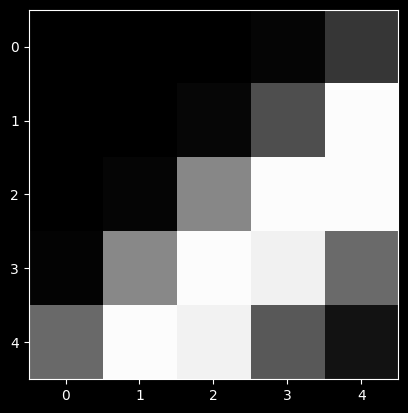

Пример картинки:


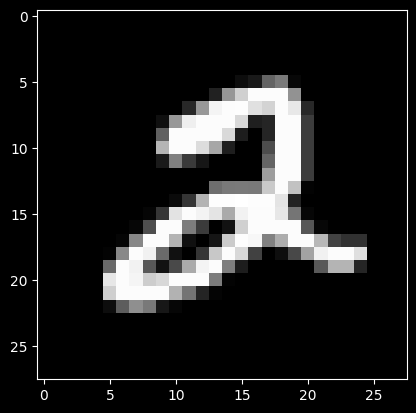

y_train [shape (60000,)] 10 примеров:
 [5 0 4 1 9 2 1 3 1 4]


In [24]:
# draw the picture
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочки картинки (пиксели со значением от 0 до 255):")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

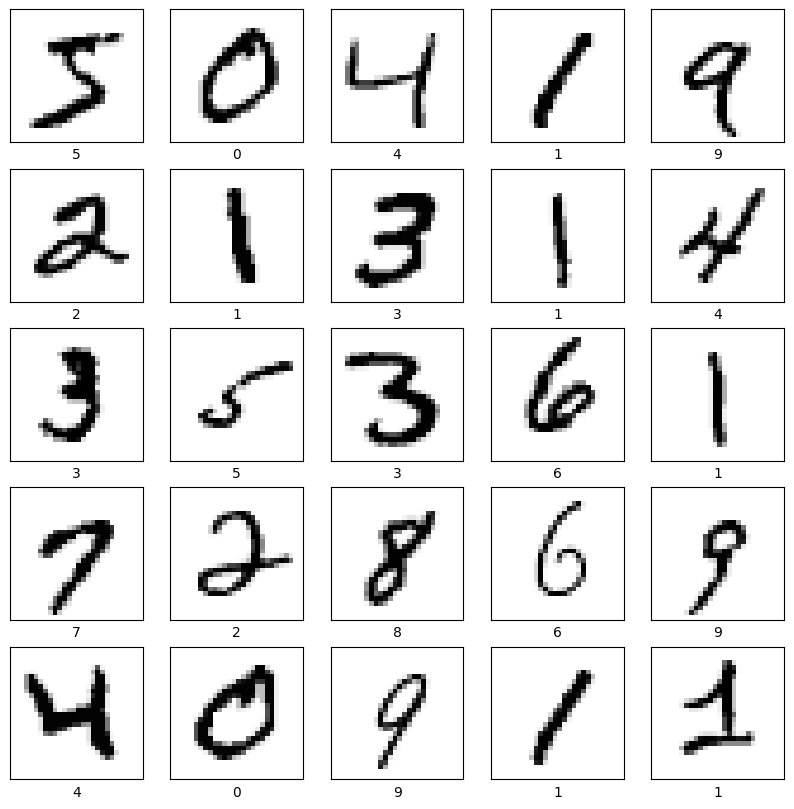

In [6]:
# Посмотрим побольше примеров
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="Greys")
    plt.xlabel(y_train[i]) 

# Data

In [7]:
# вытянем картинку в вектор размера 28х28=784 и будем использовать как фичи
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)
x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val_flat.shape)

(60000, 784)
(10000, 784)


In [8]:
# центрируем и нормируем, так сети будет проще учиться
x_train_float = x_train_flat.astype(np.float) / 255 - 0.5
x_val_float = x_val_flat.astype(np.float) / 255 - 0.5

# это тоже самое, что нормализация через StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train_flat = scaler.fit_transform(x_train_flat)
# x_val_flat = scaler.transform(x_val_flat)

# x_train_float = x_train_flat.astype(np.float)
# x_val_float = x_val_flat.astype(np.float)

In [9]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


In [10]:
clear_session()

In [11]:
# Архитектура сети
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_float.shape[1],)))
model.add(Dense(128, activation='relu',))
model.add(Dense(10, activation='softmax',))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(
    loss = 'categorical_crossentropy', # минимизируем кросс-энтропию
    optimizer='adam', 
    metrics=['accuracy'] # выводим процент правильных ответов
)

In [14]:
history = model.fit(
    x_train_float,
    y_train_oh,
    batch_size=64, # 64 объекта для подсчёта градиента на каждом шаге
    epochs=10, # 10 проходов по датасету
    validation_data=(x_val_float, y_val_oh)
)

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.4541 - accuracy: 0.8652 - val_loss: 0.3733 - val_accuracy: 0.8880
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.5442 - accuracy: 0.8644 - val_loss: 0.7453 - val_accuracy: 0.8494
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 1.4888 - accuracy: 0.8148 - val_loss: 3.6417 - val_accuracy: 0.7230
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 2.7648 - accuracy: 0.8036 - val_loss: 5.7785 - val_accuracy: 0.6964
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 3.9837 - accuracy: 0.8006 - val_loss: 3.9440 - val_accuracy: 0.8032
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 5.4947 - accuracy: 0.7985 - val_loss: 6.0738 - val_accuracy: 0.7955
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 7.3211 - accuracy: 0.7904 - val_loss: 9.2258 - val_accuracy: 0.7694
Epoch 

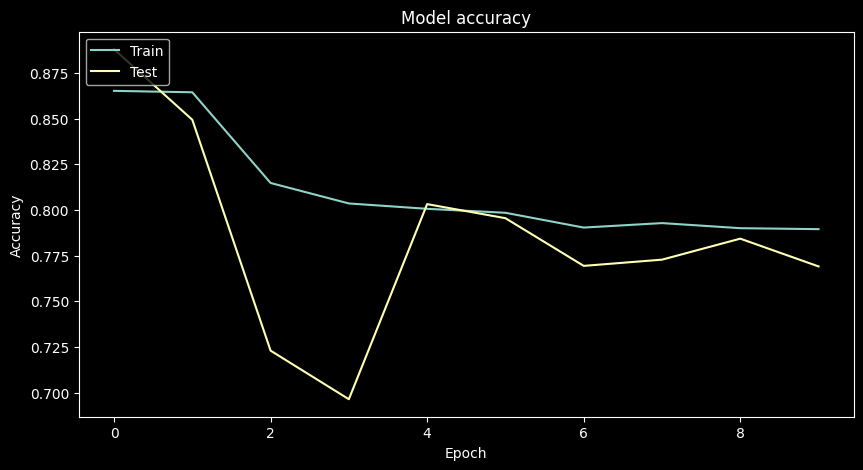

In [15]:
# Plot trainig & validation accuracy values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

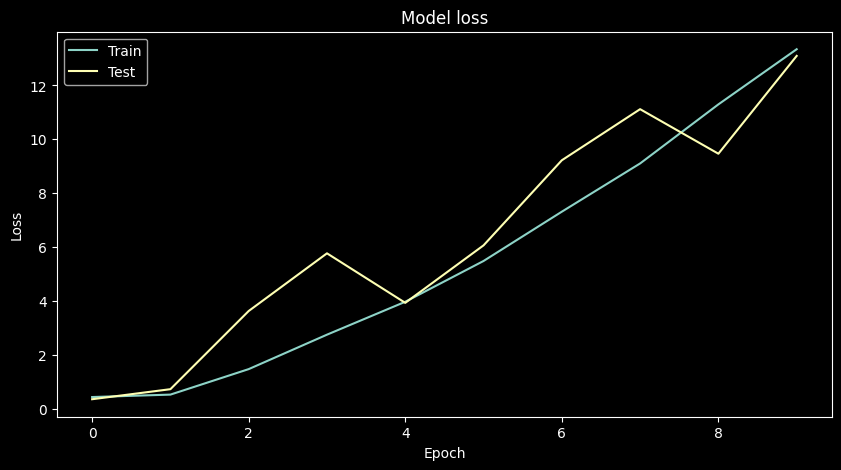

In [16]:
# Plot trainig & validation loss values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
model.predict(x_val_float)

313/313 [==============================] - 0s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999928e-01, 0.0000000e+00, 6.7273470e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.8947378e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.2289122e-28, 1.2061235e-22],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [25]:
predicts = model.predict(x_val_float)
print('Test Accuracy: ', accuracy_score(y_val, predicts))

313/313 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets